# Week 9 Independent Lab
### BGEN 623 | University of Montana MSBA Program
### Alex McKenzie | April 28, 2025

In [1]:
# load modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

ect = pd.read_csv('/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week9labs/data/ect_data.txt', sep='\t', engine='python')
print(ect.columns.tolist())

# Note I had some problems executing cell 11 because A) I didn't use 'sep='\t'', so had to come back here to revise; and then B) I had issues using the 'add_constant' command due to having imported 'statsmodels.formulas.api', as we did in the tutorial.

['attitude1_01', 'attitude1_02', 'attitude1_03', 'attitude1_04', 'intent1_01', 'intent1_02', 'intent1_03', 'intent1_04', 'peruse01', 'peruse02', 'peruse03', 'peruse04', 'satis01', 'satis02', 'satis03', 'satis04']


In [2]:
print(ect.columns.tolist())


['attitude1_01', 'attitude1_02', 'attitude1_03', 'attitude1_04', 'intent1_01', 'intent1_02', 'intent1_03', 'intent1_04', 'peruse01', 'peruse02', 'peruse03', 'peruse04', 'satis01', 'satis02', 'satis03', 'satis04']


In [6]:
from statsmodels.tools import add_constant

# Define predictors and response
X = ect[['peruse01', 'peruse02', 'peruse03', 'satis03', 'satis04']]
y = ect['intent1_01']

# Add intercept
X = sm.add_constant(X)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

# View results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     35.02
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.79e-25
Time:                        15:23:52   Log-Likelihood:                -224.26
No. Observations:                 201   AIC:                             460.5
Df Residuals:                     195   BIC:                             480.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6140      0.357      4.520      0.0

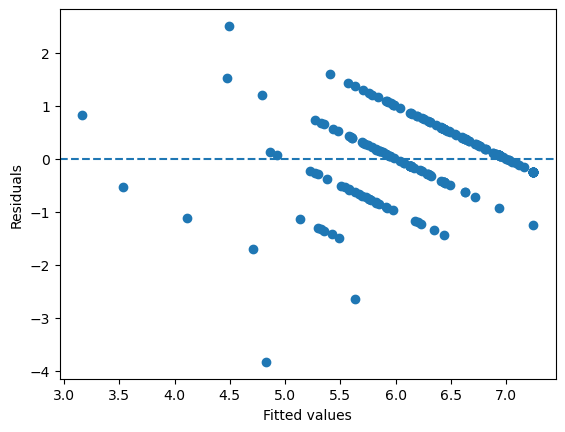

In [8]:
# At this point I'm lost enough on the underlying statistical concepts that it makes the coding a tough ask. We're supposed to assess the assumptions, but I'm not sure what they even are!

# scatter plot of fitted vs. residuals
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# assume X_const is your design matrix including the constant
vifs = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)
print(vifs)


const       45.584285
peruse01     2.907392
peruse02     2.735239
peruse03     2.934754
satis03      2.013541
satis04      2.202170
dtype: float64


In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)
print('BP p-value =', bp_pvalue)


BP p-value = 3.32337900399549e-05


In [11]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print('Durbin–Watson =', dw)


Durbin–Watson = 1.9047285601167387


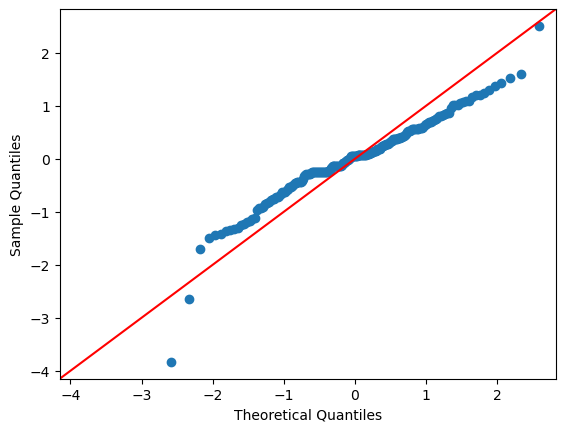

In [12]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='45')
plt.show()


In [13]:
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Shapiro p-value =', p)


Shapiro p-value = 3.546790585127104e-06


### Interpreting results:  

Linearity: Not sure what's going on, but relationship definitely isn't linear.

Colinearity: Variance inflation factors are less than 5.0, so ChatGPT tells me we don't have any colinearity problems here. Admittedly, I'd a bit lost with this one.

Homoscedasticity: ChatGPT says "p < 0.05 rejects constant-variance; residual variance changes with fitted values (heteroscedasticity)." Again, I'm fairly lost on the underlying statistical concepts.

Independence: "Close to 2; no serious autocorrelation in residuals." Help!

Normality: "Heavy tails and p < 0.05 tell us residuals deviate significantly from normal." I actually get the basic concept here, but the math and coding are still feeling quite elusive.

In [15]:
# Overall model F-test
print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

# Individual coefficient t-tests
print("Coefficients:\n", model.params)
print("   t-values:\n", model.tvalues)
print("   p-values:\n", model.pvalues)

F-statistic: 35.0244209799111
F-test p-value: 1.789524331981252e-25
Coefficients:
 const       1.613962
peruse01    0.275291
peruse02    0.029308
peruse03    0.190271
satis03     0.128428
satis04     0.181164
dtype: float64
   t-values:
 const       4.520465
peruse01    3.277190
peruse02    0.408137
peruse03    2.419460
satis03     2.070689
satis04     2.519005
dtype: float64
   p-values:
 const       0.000011
peruse01    0.001241
peruse02    0.683621
peruse03    0.016461
satis03     0.039705
satis04     0.012572
dtype: float64


### Interpreting the results:

##### I am at this point totally lost, so am just going straight to the oracle:

### Which variables are significant?
Based on the individual t-tests (p-values < 0.05), four predictors are significant:

peruse01 (p ≈ 0.0012)

peruse03 (p ≈ 0.0165)

satis03 (p ≈ 0.0397)

satis04 (p ≈ 0.0126)

(peruse02 is not significant, p ≈ 0.68.)

The overall F-test (F ≈ 35.0, p ≈ 1.8 × 10⁻²⁵) confirms the model as a whole explains a significant amount of variance in intent1_01.

### Two business-driven interpretations:

peruse01 (β ≈ 0.275, p ≈ 0.0012)

What it measures: Users’ belief that “this system improves my job performance” (e.g. perceived usefulness).

Why it matters: When employees see a clear productivity boost, they’re far more likely to intend to use the system. Investing in features or training that highlight performance gains will therefore drive adoption.

satis04 (β ≈ 0.181, p ≈ 0.0126)

What it measures: Overall satisfaction with the system (e.g. “I’m pleased with how the system works”).

Why it matters: Even if a tool is useful, low satisfaction (due to usability issues, support gaps, etc.) erodes intention to use. Focusing on user experience improvements and responsive support can therefore boost long-term adoption.

These two variables explain both the “can-do” belief (usefulness) and the “want-to” feeling (satisfaction), which together form the core of driving user intent.

#### At this point I'm kind of back on track -- we're measuring the employees responses to onboarding of the new system, and trying to take some measure of team morale and productivity outcomes. But the statistical approach is beyond me knowledge.

### Provide the equation for my model and interpret the results:

intent1_01_pred = 1.613962 
                  + 0.275291*peruse01 
                  + 0.029308*peruse02 
                  + 0.190271*peruse03 
                  + 0.128428*satis03 
                  + 0.181164*satis04

"Employees’ perceptions of usefulness (especially peruse01 and peruse03) and their satisfaction (satis03 and satis04) all have positive, statistically significant associations with their stated intention to use the system. Peruse01 is the single strongest predictor in this model."

# References and Comments

I used ChatGPT for this assignment:

https://drive.google.com/file/d/17RK9UM84AtfDEFG0zwWP4n4UGIJV49Fr/view?usp=sharing

##### This assigment was interesting in a "wow, neat" sort of way... But to be honest, the combination of new statistical concepts, and underlying code syntax, makes it a fairly elusive experience. FWIW, note that I am currently using Jupyter for my professional work in finance and economic development, so I definitely AM learning a lot in this class that is proving useful. But this particular assignment was decidedly outside my bandwidth.